In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Introduction

ESG Risk ratings data from Kaggle

Link: https://www.kaggle.com/datasets/pritish509/s-and-p-500-esg-risk-ratings/data

In [4]:
sp500_esg = pd.read_csv('SP 500 ESG Risk Ratings.csv')

### About the dataset

The feature variables in this dataset contains basic information about each company and various ESG Risk Scores.

Exploratory analysis will be carried out on this dataset and will be instrumental in selecting which Stocks (Symbols/ Tickers) will eventually be used for further analysis.

The aim is to select only the stocks with highest risk ratings and lowest risk ratings, but also within that subset, stocks that are of similar volume/mcap to avoid confounding variables that might give undue influence to the results.

In [6]:
sp500_esg.head()

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,ENPH,"Enphase Energy, Inc.","47281 Bayside Parkway\nFremont, CA 94538\nUnit...",Technology,Solar,"3,157","Enphase Energy, Inc., together with its subsid...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EMN,Eastman Chemical Company,"200 South Wilcox Drive\nKingsport, TN 37662\nU...",Basic Materials,Specialty Chemicals,"14,000",Eastman Chemical Company operates as a special...,25.3,12.8,6.6,5.8,Moderate Controversy Level,2.0,50th percentile,Medium
2,DPZ,Domino's Pizza Inc.,"30 Frank Lloyd Wright Drive\nAnn Arbor, MI 481...",Consumer Cyclical,Restaurants,"6,500","Domino's Pizza, Inc., through its subsidiaries...",29.2,10.6,6.3,12.2,Moderate Controversy Level,2.0,66th percentile,Medium
3,DAY,"Dayforce, Inc.","3311 East Old Shakopee Road\nMinneapolis, MN 5...",Technology,Software - Application,"9,084","Dayforce Inc., together with its subsidiaries,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DVA,Davita Inc.,"2000 16th Street\nDenver, CO 80202\nUnited States",Healthcare,Medical Care Facilities,"70,000",DaVita Inc. provides kidney dialysis services ...,22.6,0.1,8.4,14.1,Moderate Controversy Level,2.0,38th percentile,Medium


### Data cleaning:

Before doing basic EDA for more insight on the dataset, we will drop a few features and eliminate rows with missing values

In [8]:
sp500_esg = sp500_esg.drop(['Address','Description'],axis=1)

In [9]:
# check for missing values and drop row-wise if any
print(sp500_esg.isnull().sum())

Symbol                      0
Name                        0
Sector                      1
Industry                    1
Full Time Employees         5
Total ESG Risk score       73
Environment Risk Score     73
Governance Risk Score      73
Social Risk Score          73
Controversy Level          73
Controversy Score         100
ESG Risk Percentile        73
ESG Risk Level             73
dtype: int64


In [10]:
sp500_esg = sp500_esg.dropna()
print(sp500_esg.isnull().sum())

Symbol                    0
Name                      0
Sector                    0
Industry                  0
Full Time Employees       0
Total ESG Risk score      0
Environment Risk Score    0
Governance Risk Score     0
Social Risk Score         0
Controversy Level         0
Controversy Score         0
ESG Risk Percentile       0
ESG Risk Level            0
dtype: int64


In [11]:
sector_industry = sp500_esg.groupby(['Sector','Industry'])['Total ESG Risk score'].mean()
sector_industry

Sector           Industry                               
Basic Materials  Agricultural Inputs                        31.166667
                 Building Materials                         29.700000
                 Chemicals                                  26.100000
                 Copper                                     31.600000
                 Gold                                       20.500000
                                                              ...    
Utilities        Utilities - Diversified                    25.150000
                 Utilities - Independent Power Producers    32.000000
                 Utilities - Regulated Electric             26.761905
                 Utilities - Regulated Gas                  30.300000
                 Utilities - Regulated Water                21.600000
Name: Total ESG Risk score, Length: 108, dtype: float64

## Exploratory Plots

1. Which sectors have higher Environmental, Social and Governance risk scores on average?
2. How many companies fall under each controversy level

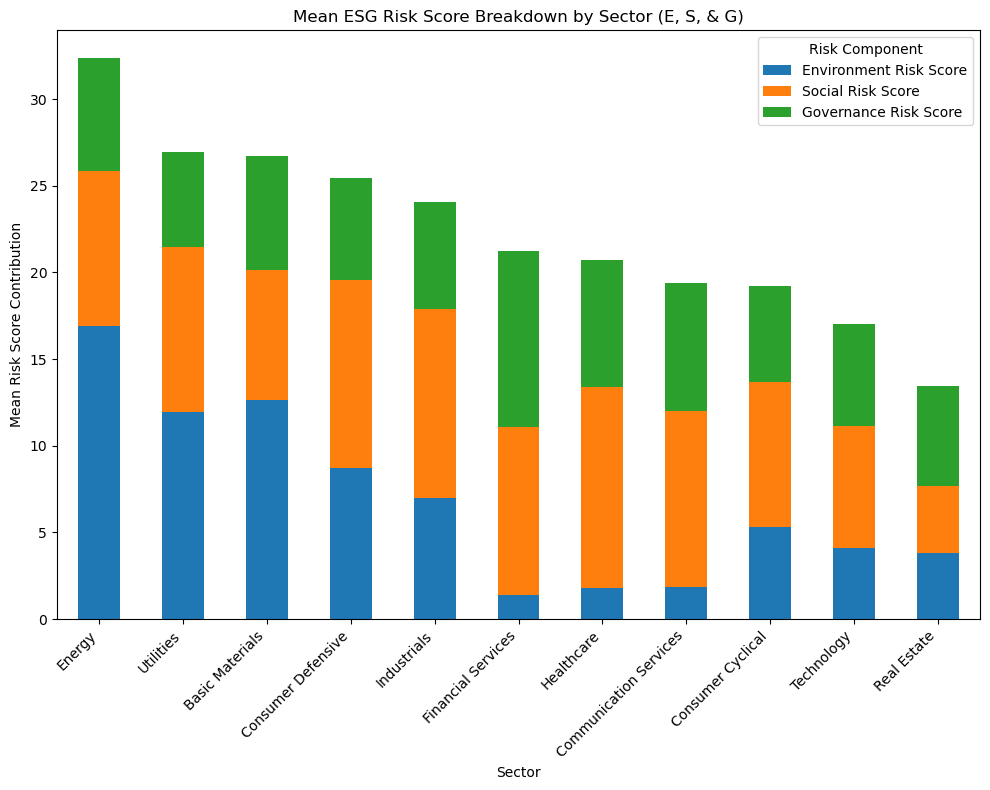

In [13]:
#define the risk groups
risk_groups = ['Environment Risk Score', 'Social Risk Score', 'Governance Risk Score']

#group by sector and calculate the mean for each risk group
risk_groups_avg = sp500_esg.groupby('Sector')[risk_groups].mean()

#sort by total for clearer visualisation then drop column total
risk_groups_avg['Total'] = risk_groups_avg.sum(axis=1)
risk_groups_avg = risk_groups_avg.sort_values(by='Total', ascending=False).drop(columns='Total')

#stacked bar plot
plt.figure(figsize=(10, 8))
risk_groups_avg.plot(
    kind='bar',
    stacked=True,
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],  #ESG colours
    ax=plt.gca()
)

plt.title('Mean ESG Risk Score Breakdown by Sector (E, S, & G)')
plt.ylabel('Mean Risk Score Contribution')
plt.xlabel('Sector')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Risk Component', loc='upper right')
plt.tight_layout()
plt.show()

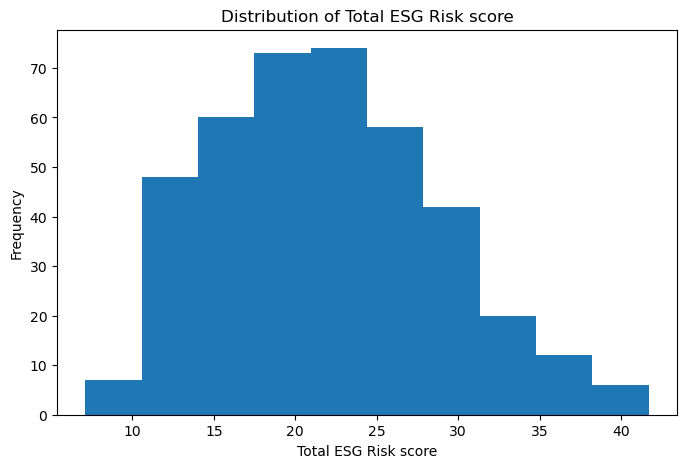

In [14]:
plt.figure(figsize=(8, 5))
plt.hist(sp500_esg['Total ESG Risk score'])

plt.xlabel('Total ESG Risk score')
plt.ylabel('Frequency')
plt.title('Distribution of Total ESG Risk score')
plt.savefig('dist.png')
plt.show()

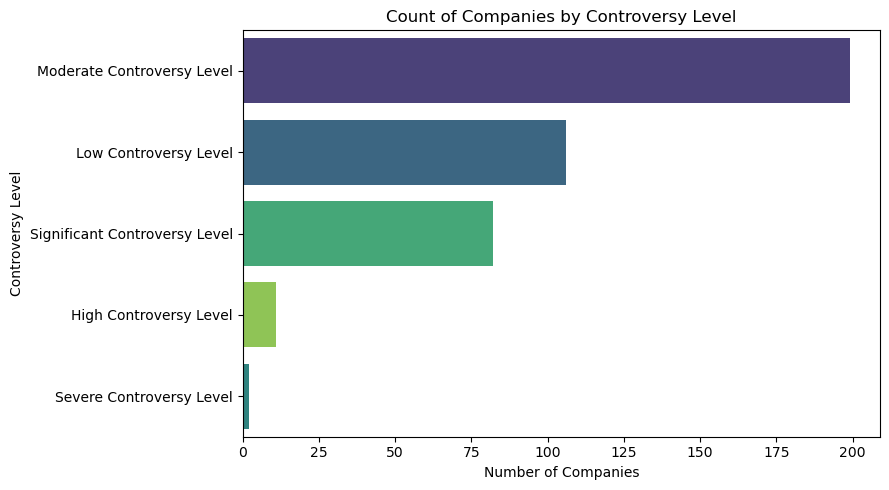

In [15]:
plt.figure(figsize=(9, 5))

sns.countplot(
    data=sp500_esg,
    y='Controversy Level',
    order=sp500_esg['Controversy Level'].value_counts().index,
    palette='viridis',
    hue='Controversy Level',
    legend=False,  
)

plt.title('Count of Companies by Controversy Level')
plt.xlabel('Number of Companies')
plt.ylabel('Controversy Level')
plt.tight_layout()
plt.show()

### Basic Summary stats

In [17]:
sp500_esg.describe()

,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Score
count,400.000000,400.000000,400.00000,400.00000,400.000000
mean,21.911750,5.825000,6.81325,9.27575,2.010000
std,6.860295,5.215629,2.23851,3.62729,0.791496
min,7.100000,0.000000,3.00000,0.80000,1.000000
25%,16.700000,1.600000,5.30000,6.87500,1.000000
50%,21.400000,4.100000,6.20000,9.10000,2.000000
75%,26.100000,9.225000,7.82500,11.42500,2.000000
max,41.700000,25.000000,19.40000,22.50000,5.000000


In [18]:
#count unique values in controversy level and map a numerical value to each
unique_controversy_levels = sp500_esg['Controversy Level'].value_counts()
unique_risk_levels = sp500_esg['ESG Risk Level'].value_counts()

print(unique_controversy_levels)
print(unique_risk_levels)

Controversy Level
Moderate Controversy Level       199
Low Controversy Level            106
Significant Controversy Level     82
High Controversy Level            11
Severe Controversy Level           2
Name: count, dtype: int64
ESG Risk Level
Medium        178
Low           164
High           50
Negligible      5
Severe          3
Name: count, dtype: int64


In [19]:
controversy_map = {
    'Low Controversy Level' : 0,
    'Moderate Controversy Level': 1,
    'High Controversy Level': 2,
    'Significant Controversy Level': 3,
    'Severe Controversy Level': 4
}

risk_map = {
    'Negligible' : 0,
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Severe': 4
}

sp500_esg['Controvery Level Num'] = sp500_esg['Controversy Level'].map(controversy_map)
sp500_esg['Risk Level Num'] = sp500_esg['ESG Risk Level'].map(risk_map)

In [20]:
sp500_esg.head()

,Symbol,Name,Sector,Industry,Full Time Employees,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level,Controvery Level Num,Risk Level Num
1,EMN,Eastman Chemical Company,Basic Materials,Specialty Chemicals,"14,000",25.3,12.8,6.6,5.8,Moderate Controversy Level,2.0,50th percentile,Medium,1,2
2,DPZ,Domino's Pizza Inc.,Consumer Cyclical,Restaurants,"6,500",29.2,10.6,6.3,12.2,Moderate Controversy Level,2.0,66th percentile,Medium,1,2
4,DVA,Davita Inc.,Healthcare,Medical Care Facilities,"70,000",22.6,0.1,8.4,14.1,Moderate Controversy Level,2.0,38th percentile,Medium,1,2
5,DRI,"Darden Restaurants, Inc.",Consumer Cyclical,Restaurants,"187,384",27.5,7.9,4.6,15.0,Moderate Controversy Level,2.0,59th percentile,Medium,1,2
6,ZTS,Zoetis Inc.,Healthcare,Drug Manufacturers - Specialty & Generic,"14,100",18.8,3.2,8.7,6.8,Moderate Controversy Level,2.0,23rd percentile,Low,1,1


In [21]:
# create new esg risk percentile column with the string values extracted
sp500_esg['ESG Risk Percentile Num'] = sp500_esg['ESG Risk Percentile'].str.extract(r'(\d+)', expand=False).astype(int)
sp500_esg.dtypes

Symbol                      object
Name                        object
Sector                      object
Industry                    object
Full Time Employees         object
Total ESG Risk score       float64
Environment Risk Score     float64
Governance Risk Score      float64
Social Risk Score          float64
Controversy Level           object
Controversy Score          float64
ESG Risk Percentile         object
ESG Risk Level              object
Controvery Level Num         int64
Risk Level Num               int64
ESG Risk Percentile Num      int32
dtype: object

In [22]:
sp500_esg.describe()

,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Score,Controvery Level Num,Risk Level Num,ESG Risk Percentile Num
count,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000
mean,21.911750,5.825000,6.81325,9.27575,2.010000,1.187500,1.705000,36.992500
std,6.860295,5.215629,2.23851,3.62729,0.791496,1.060734,0.727529,24.217114
min,7.100000,0.000000,3.00000,0.80000,1.000000,0.000000,0.000000,1.000000
25%,16.700000,1.600000,5.30000,6.87500,1.000000,0.000000,1.000000,16.000000
50%,21.400000,4.100000,6.20000,9.10000,2.000000,1.000000,2.000000,34.000000
75%,26.100000,9.225000,7.82500,11.42500,2.000000,1.000000,2.000000,53.250000
max,41.700000,25.000000,19.40000,22.50000,5.000000,4.000000,4.000000,93.000000


### Plot Correlation matrix

Visualise the correlation between numerical features 

In [24]:
#create df of the numerical columns
object_cols = [col for col in sp500_esg.columns if sp500_esg[col].dtype == 'object']
sp500_esg_num = sp500_esg.drop(columns=object_cols)
sp500_esg_num.head()

,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Score,Controvery Level Num,Risk Level Num,ESG Risk Percentile Num
1,25.3,12.8,6.6,5.8,2.0,1,2,50
2,29.2,10.6,6.3,12.2,2.0,1,2,66
4,22.6,0.1,8.4,14.1,2.0,1,2,38
5,27.5,7.9,4.6,15.0,2.0,1,2,59
6,18.8,3.2,8.7,6.8,2.0,1,1,23


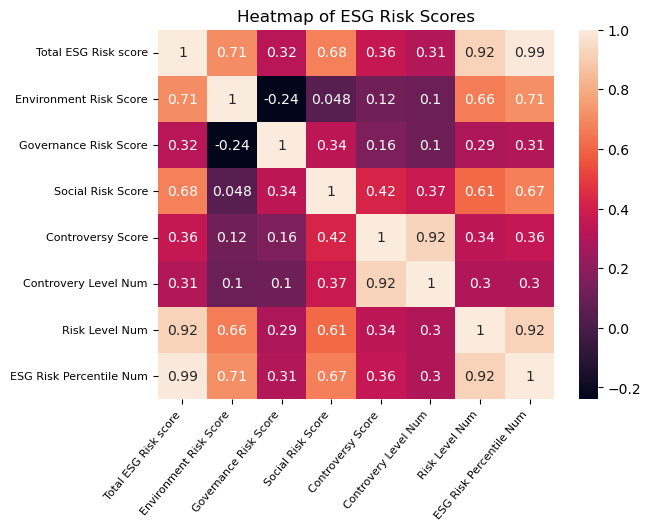

In [25]:
correlation_matrix = sp500_esg_num.corr(method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.xticks(rotation=50, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.title("Heatmap of ESG Risk Scores")
plt.savefig('corr.png')
plt.show()

### Interpretation:  
The environmental and social risk scores are highly positively correlated to the Total ESG Risk score. Interestingly enough, the governance and controversy score have a weaker positive correlation to the Total ESG Score. The features Environment Risk Score and Governance Risk Score are weakly negatively correlated, which indicates that one feature increases as the other decreases.

### Feature Selection

To analyse and predict the returns based on esg risk ratings, the stratification variable will be the Total ESG Risk Score.

First, we select 50 highest and 50 lowest esg scoring stocks. We then fetch the mcap and volume data of these stocks from yfinance in order to select stocks that fall into a similar range, to avoid confounding effects on the analysis. 

Steps:
1. Selecting the symbols of the 50 highest and lowest scoring in terms of esg risk
2. Use the symbols to fetch mcap and volume data from the yfinance api
3. Filter out outliers, that is, stocks with volume and mcap tha falls below the 25th quartile and 75th quartile
4. Save the symbols to a list, fetching daily data for each symbol over a period of 2 years prior to current date.

In [28]:
import yfinance as yf
from tqdm import tqdm

#sort to select lowest, highest x
x = 50

sorted_sp500_esg = sp500_esg.sort_values('Total ESG Risk score')

lowest_risk = sorted_sp500_esg.head(x)
highest_risk = sorted_sp500_esg.tail(x)

#get the symbols of the highest and lowest esg risk rated to a list
selected_stocks = pd.concat([lowest_risk, highest_risk])
tickers = selected_stocks['Symbol'].tolist()

data_list = []

for ticker in tqdm(tickers):
    try:
        info = yf.Ticker(ticker).info
        data_list.append({
            'Symbol': ticker,
            'MarketCap': info.get('marketCap'),
            'AverageVolume': info.get('averageVolume'),
            'Sector': info.get('sector')
        })
    except Exception as e:
        print(f'Error fetching {ticker}: {e}')

filtered_df = pd.DataFrame(data_list)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:36<00:00,  2.73it/s]


In [29]:
filtered_df.head()

,Symbol,MarketCap,AverageVolume,Sector
0,HAS,1.224300e+10,1774258.0,Consumer Cyclical
1,KEYS,3.566837e+10,1239380.0,Technology
2,CBRE,4.965041e+10,1453440.0,Real Estate
3,ACN,1.740978e+11,3855838.0,Technology
4,AVB,2.537835e+10,985775.0,Real Estate


In [30]:
filtered_df.shape

(100, 4)

In [31]:
sp500_selected = selected_stocks.merge(filtered_df, on='Symbol', how='left')

In [32]:
sp500_selected.head()

,Symbol,Name,Sector_x,Industry,Full Time Employees,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level,Controvery Level Num,Risk Level Num,ESG Risk Percentile Num,MarketCap,AverageVolume,Sector_y
0,HAS,"Hasbro, Inc.",Consumer Cyclical,Leisure,"5,502",7.1,0.0,4.2,2.9,Moderate Controversy Level,2.0,1st percentile,Negligible,1,0,1,1.224300e+10,1774258.0,Consumer Cyclical
1,KEYS,"Keysight Technologies, Inc.",Technology,Scientific & Technical Instruments,"15,400",7.6,1.2,4.7,1.8,Low Controversy Level,1.0,1st percentile,Negligible,0,0,1,3.566837e+10,1239380.0,Technology
2,CBRE,"Cbre Group, Inc.",Real Estate,Real Estate Services,"130,000",8.0,1.5,4.6,1.9,Low Controversy Level,1.0,2nd percentile,Negligible,0,0,2,4.965041e+10,1453440.0,Real Estate
3,ACN,Accenture Plc,Technology,Information Technology Services,"742,000",9.8,0.8,4.4,4.6,Moderate Controversy Level,2.0,3rd percentile,Negligible,1,0,3,1.740978e+11,3855838.0,Technology
4,AVB,"Avalonbay Communities, Inc.",Real Estate,REIT - Residential,"2,978",9.8,3.0,4.8,2.0,Low Controversy Level,1.0,3rd percentile,Negligible,0,0,3,2.537835e+10,985775.0,Real Estate


In [33]:
# filter out outlier stocks (outside the 25th and 75th quartile) in volume and mcap 
vol_low, vol_high = sp500_selected['AverageVolume'].quantile([0.25, 0.75])
mcap_low, mcap_high = sp500_selected['MarketCap'].quantile([0.25, 0.75])

similar_df = sp500_selected[
    (sp500_selected['AverageVolume'] >= vol_low) & (sp500_selected['AverageVolume'] <= vol_high) &
    (sp500_selected['MarketCap'] >= mcap_low) & (sp500_selected['MarketCap'] <= mcap_high)
]


In [34]:
similar_df.shape

(20, 19)

In [35]:
symbols = similar_df['Symbol'].tolist()
print(symbols)

['APTV', 'STX', 'AMT', 'ELV', 'CI', 'EQR', 'ORLY', 'NDAQ', 'EA', 'A', 'MPC', 'PPL', 'ADM', 'NRG', 'VLO', 'EOG', 'PSX', 'EQT', 'TSN', 'MMM']


In [36]:
data = yf.download(symbols, period='2y', interval='1d', group_by='ticker')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19932\2813213317.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbols, period='2y', interval='1d', group_by='ticker')
[*********************100%***********************]  20 of 20 completed


In [37]:
data.head()

Ticker              EA                                               \
Price             Open        High         Low       Close   Volume   
Date                                                                  
2024-01-09  134.788572  137.095445  134.788572  136.352890  1328500   
2024-01-10  136.352912  136.956858  135.541045  136.263809  1735300   
2024-01-11  136.194460  136.729108  135.491516  136.372681  1192600   
2024-01-12  136.887540  137.402382  136.065777  136.550919  1132700   
2024-01-16  136.580605  136.788527  135.145002  135.788544  1166800   

Ticker             AMT                                               ...  \
Price             Open        High         Low       Close   Volume  ...   
Date                                                                 ...   
2024-01-09  200.299489  200.364893  196.486929  197.972702  1578800  ...   
2024-01-10  197.739074  198.187606  194.711449  195.272125  2088900  ...   
2024-01-11  194.636698  195.057212  192.580910  194.038651  2271600  ...   
2024-01-12  195.926239  197.935316  194.795561  195.701965  1763400  ...   
2024-01-16  195.272123  197.019540  193.945205  194.412430  2400000  ...   

Ticker             PSX                                               \
Price             Open        High         Low       Close   Volume   
Date                                                                  
2024-01-09  124.860935  124.860935  123.031752  124.319656  2172600   
2024-01-10  124.636953  124.636953  120.325279  120.773254  3619900   
2024-01-11  121.267885  122.182476  120.586608  121.585190  3540000   
2024-01-12  123.666353  124.076990  122.807755  124.002327  2909900   
2024-01-16  124.123647  124.618274  120.474595  120.829239  3169400   

Ticker            TSN                                            
Price            Open       High        Low      Close   Volume  
Date                                                             
2024-01-09  51.229287  51.780441  51.070479  51.687027  1787800  
2024-01-10  51.584263  51.752411  50.808909  50.911667  1874500  
2024-01-11  50.724830  50.874295  50.211043  50.706146  1635200  
2024-01-12  50.995742  51.285332  50.566029  51.257305  2140200  
2024-01-16  51.378749  51.416117  50.724837  51.033112  1524100  

[5 rows x 100 columns]

In [38]:
data.columns

MultiIndex([(  'EA',   'Open'),
            (  'EA',   'High'),
            (  'EA',    'Low'),
            (  'EA',  'Close'),
            (  'EA', 'Volume'),
            ( 'AMT',   'Open'),
            ( 'AMT',   'High'),
            ( 'AMT',    'Low'),
            ( 'AMT',  'Close'),
            ( 'AMT', 'Volume'),
            ( 'STX',   'Open'),
            ( 'STX',   'High'),
            ( 'STX',    'Low'),
            ( 'STX',  'Close'),
            ( 'STX', 'Volume'),
            ('ORLY',   'Open'),
            ('ORLY',   'High'),
            ('ORLY',    'Low'),
            ('ORLY',  'Close'),
            ('ORLY', 'Volume'),
            (  'CI',   'Open'),
            (  'CI',   'High'),
            (  'CI',    'Low'),
            (  'CI',  'Close'),
            (  'CI', 'Volume'),
            ('NDAQ',   'Open'),
            ('NDAQ',   'High'),
            ('NDAQ',    'Low'),
            ('NDAQ',  'Close'),
            ('NDAQ', 'Volume'),
            (   'A',   'Open'),
        

In [39]:
#reset index to bring date to df
data = data.reset_index()
data.head()

Ticker       Date          EA                                               \
Price                    Open        High         Low       Close   Volume   
0      2024-01-09  134.788572  137.095445  134.788572  136.352890  1328500   
1      2024-01-10  136.352912  136.956858  135.541045  136.263809  1735300   
2      2024-01-11  136.194460  136.729108  135.491516  136.372681  1192600   
3      2024-01-12  136.887540  137.402382  136.065777  136.550919  1132700   
4      2024-01-16  136.580605  136.788527  135.145002  135.788544  1166800   

Ticker         AMT                                      ...         PSX  \
Price         Open        High         Low       Close  ...        Open   
0       200.299489  200.364893  196.486929  197.972702  ...  124.860935   
1       197.739074  198.187606  194.711449  195.272125  ...  124.636953   
2       194.636698  195.057212  192.580910  194.038651  ...  121.267885   
3       195.926239  197.935316  194.795561  195.701965  ...  123.666353   
4       195.272123  197.019540  193.945205  194.412430  ...  124.123647   

Ticker                                                     TSN             \
Price         High         Low       Close   Volume       Open       High   
0       124.860935  123.031752  124.319656  2172600  51.229287  51.780441   
1       124.636953  120.325279  120.773254  3619900  51.584263  51.752411   
2       122.182476  120.586608  121.585190  3540000  50.724830  50.874295   
3       124.076990  122.807755  124.002327  2909900  50.995742  51.285332   
4       124.618274  120.474595  120.829239  3169400  51.378749  51.416117   

Ticker                                 
Price         Low      Close   Volume  
0       51.070479  51.687027  1787800  
1       50.808909  50.911667  1874500  
2       50.211043  50.706146  1635200  
3       50.566029  51.257305  2140200  
4       50.724837  51.033112  1524100  

[5 rows x 101 columns]

In [40]:
data.columns

MultiIndex([('Date',       ''),
            (  'EA',   'Open'),
            (  'EA',   'High'),
            (  'EA',    'Low'),
            (  'EA',  'Close'),
            (  'EA', 'Volume'),
            ( 'AMT',   'Open'),
            ( 'AMT',   'High'),
            ( 'AMT',    'Low'),
            ( 'AMT',  'Close'),
            ...
            ( 'PSX',   'Open'),
            ( 'PSX',   'High'),
            ( 'PSX',    'Low'),
            ( 'PSX',  'Close'),
            ( 'PSX', 'Volume'),
            ( 'TSN',   'Open'),
            ( 'TSN',   'High'),
            ( 'TSN',    'Low'),
            ( 'TSN',  'Close'),
            ( 'TSN', 'Volume')],
           names=['Ticker', 'Price'], length=101)

In [41]:
# flatten multilevel columns safely (join only non-empty levels and handle varying lengths)
data.columns = ['_'.join([str(level) for level in col if level != ''])
                if isinstance(col, tuple) else col
                for col in data.columns]
data.head()

,Date,EA_Open,EA_High,EA_Low,EA_Close,EA_Volume,AMT_Open,AMT_High,AMT_Low,AMT_Close,...,PSX_Open,PSX_High,PSX_Low,PSX_Close,PSX_Volume,TSN_Open,TSN_High,TSN_Low,TSN_Close,TSN_Volume
0,2024-01-09,134.788572,137.095445,134.788572,136.352890,1328500,200.299489,200.364893,196.486929,197.972702,...,124.860935,124.860935,123.031752,124.319656,2172600,51.229287,51.780441,51.070479,51.687027,1787800
1,2024-01-10,136.352912,136.956858,135.541045,136.263809,1735300,197.739074,198.187606,194.711449,195.272125,...,124.636953,124.636953,120.325279,120.773254,3619900,51.584263,51.752411,50.808909,50.911667,1874500
2,2024-01-11,136.194460,136.729108,135.491516,136.372681,1192600,194.636698,195.057212,192.580910,194.038651,...,121.267885,122.182476,120.586608,121.585190,3540000,50.724830,50.874295,50.211043,50.706146,1635200
3,2024-01-12,136.887540,137.402382,136.065777,136.550919,1132700,195.926239,197.935316,194.795561,195.701965,...,123.666353,124.076990,122.807755,124.002327,2909900,50.995742,51.285332,50.566029,51.257305,2140200
4,2024-01-16,136.580605,136.788527,135.145002,135.788544,1166800,195.272123,197.019540,193.945205,194.412430,...,124.123647,124.618274,120.474595,120.829239,3169400,51.378749,51.416117,50.724837,51.033112,1524100


In [42]:
#melt into long format
data_long = data.melt(id_vars='Date', var_name='Ticker_Info', value_name='Value')

In [43]:
data_long.head()

,Date,Ticker_Info,Value
0,2024-01-09,EA_Open,134.788572
1,2024-01-10,EA_Open,136.352912
2,2024-01-11,EA_Open,136.194460
3,2024-01-12,EA_Open,136.887540
4,2024-01-16,EA_Open,136.580605


In [44]:
#split ticker info
split_cols = data_long['Ticker_Info'].str.split('_', expand=True)

#handle cases where there are 2 or 3 parts...type is a filler column to handle 3 splits
if split_cols.shape[1] == 2:
    data_long[['Ticker', 'Field']] = split_cols
    data_long['Type'] = None  
elif split_cols.shape[1] == 3:
    data_long[['Ticker', 'Type', 'Field']] = split_cols
else:
    print("Unexpected column structure. Inspect data_long['Ticker_Info']")

data_long.head()


,Date,Ticker_Info,Value,Ticker,Field,Type
0,2024-01-09,EA_Open,134.788572,EA,Open,None
1,2024-01-10,EA_Open,136.352912,EA,Open,None
2,2024-01-11,EA_Open,136.194460,EA,Open,None
3,2024-01-12,EA_Open,136.887540,EA,Open,None
4,2024-01-16,EA_Open,136.580605,EA,Open,None


In [45]:
#pivot table to tidy format
data_tidy = data_long.pivot_table(index=['Date', 'Ticker'],
                                  columns='Field',
                                  values='Value',
                                  aggfunc='first').reset_index()

data_tidy.columns.name = None

print(data_tidy.head())
print(data_tidy.columns)


        Date Ticker       Close        High         Low        Open     Volume
0 2024-01-09      A  128.743134  133.639472  128.083066  130.309579  1435000.0
1 2024-01-09    ADM   65.647171   65.944427   65.108392   65.897985  2875100.0
2 2024-01-09    AMT  197.972702  200.364893  196.486929  200.299489  1578800.0
3 2024-01-09   APTV   82.260002   83.529999   81.919998   83.349998  2429800.0
4 2024-01-09     CI  301.611938  302.489197  297.061778  302.412089  1215500.0
Index(['Date', 'Ticker', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [46]:
#date to datetime
data_tidy['Date'] = pd.to_datetime(data_tidy['Date'])

#ensure numeric
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    data_tidy[col] = pd.to_numeric(data_tidy[col], errors='coerce')

#sort ticker and date
data_tidy = data_tidy.sort_values(['Ticker', 'Date']).reset_index(drop=True)\
#add close value percentage change
data_tidy['Return'] = data_tidy.groupby('Ticker')['Close'].pct_change()
data_tidy.head()

,Date,Ticker,Close,High,Low,Open,Volume,Return
0,2024-01-09,A,128.743134,133.639472,128.083066,130.309579,1435000.0,NaN
1,2024-01-10,A,129.147049,129.216019,126.457516,128.644613,1326300.0,0.003137
2,2024-01-11,A,127.757919,128.743098,126.004311,128.644589,2060500.0,-0.010756
3,2024-01-12,A,128.605194,129.659342,127.718539,128.378607,1285200.0,0.006632
4,2024-01-16,A,128.595367,128.871216,126.693980,127.225970,1382100.0,-0.000076


Now its time to merge the OHLCV dataset with the esg risk score on the ticker. The column name for 'Ticker' in the esg dataset is 'Symbol', which needs to be renamed before merging.

In [48]:
#create a subset of the ESG df with just the Symbol and Total ESG Risk score. rename Symbol to Ticker
esg_score_subset = sp500_esg[['Symbol', 'Total ESG Risk score']].copy()
esg_score_subset = esg_score_subset.rename(columns={'Symbol': 'Ticker'})

#merge the daily price data with the ESG score data on Ticker.
data_with_esg = data_tidy.merge(esg_score_subset, on='Ticker', how='left')
data_with_esg.head()

,Date,Ticker,Close,High,Low,Open,Volume,Return,Total ESG Risk score
0,2024-01-09,A,128.743134,133.639472,128.083066,130.309579,1435000.0,NaN,13.6
1,2024-01-10,A,129.147049,129.216019,126.457516,128.644613,1326300.0,0.003137,13.6
2,2024-01-11,A,127.757919,128.743098,126.004311,128.644589,2060500.0,-0.010756,13.6
3,2024-01-12,A,128.605194,129.659342,127.718539,128.378607,1285200.0,0.006632,13.6
4,2024-01-16,A,128.595367,128.871216,126.693980,127.225970,1382100.0,-0.000076,13.6


In [49]:
data_with_esg.to_csv('selected_esp500_esg.csv', index=False)